# Example 7.1: Wind load on traffic sign

The traffic sign displayed below is subjected to a dynamic wind load. Assume that the mass can be lumped in the middle of the sign and that the lumped mass is $M=100 kg$. Assume that the natural frequency of the system is $f_n = 2 Hz$. Assume that the mean wind velocity is $V=20m/s$, the turbulence intensity is $I_u = 0.15$ and the integral length scale $^xL_u = 100m$


<img src=".\figures\Fig_7_1.svg">

Also, assume that the dynamic wind load can be approximated as

$$F_w = \frac{1}{2}\rho A C_D \left( V + u - \dot{y} \right)^2 $$

Here $C_D = 2.0$ is the drag coefficient, $u$ is the horizontal turbulence component, and $\dot{y}$ is the velocity of the structure.

## Question 1: Show that the dynamic wind load can be approximated as
$$F_w \approx \frac{1}{2}\rho A C_D V^2\left( 1 + 2\frac{u}{V} -2 \frac{\dot{y}}{V} \right) $$

We start by expanding the expression given.

$$F_w = \frac{1}{2}\rho A C_D \left( V^2 + Vu - V\dot{y} + uV +u^2 -u\dot{y} -\dot{y}V -\dot{y}u +\dot{y}^2     \right)   $$

$$F_w = \frac{1}{2}\rho A C_D \left( V^2 + 2Vu - 2V\dot{y}  +u^2 -u\dot{y} -\dot{y}u +\dot{y}^2     \right)   $$

$$F_w = \frac{1}{2}\rho A C_D V^2 \left( 1 + 2\frac{u}{V} - 2\frac{\dot{y}}{V} +\frac{u^2}{V^2} -\frac{u\dot{y}}{V^2} -\frac{\dot{y}u}{V^2} +\frac{\dot{y}^2}{V^2}     \right)   $$

The first term in the parenthesis is the mean wind load and deterministic. The second and third term is Gaussian distributed since both the turbulence $u$ and the time derivative of the response $\dot{y}$ are Gaussian distributed. The remaining terms are problematic since they are products of two Gaussian distributed variables. The product is not Gaussian distributed, and we can, therefore, in general, not calculate the dynamic response using only mean response and auto-correlation. We can, however, assume that the turbulence component is smaller than the mean wind velocity $u<<V$ and also that the time derivative of the response is significantly smaller than the mean wind $\dot{y}<<V$. It is clear that the last three terms in the parenthesis are small compared to the first three terms, and we can approximate the wind load as

$$F_w \approx \frac{1}{2}\rho A C_D V^2\left( 1 + 2\frac{u}{V} -2 \frac{\dot{y}}{V} \right) $$

The expression above is a fair approximation for engineering purposes. The time derivative of the response is always much smaller than the mean wind velocity for any reasonable designed structure subjected to strong wind, so the assumption $\dot{y}<<V$ is fine. Assuming that the turbulence component is significantly smaller than the mean wind $u<<V$ is a crude approximation that is inaccurate for strong wind gusts. We will investigate the accuracy of the assumption later in this example.

## Question 2: Compare time series of the exact and approximate wind load. Use the auto-spectral density defined in N400

The auto-spectral density of the turbulence is in N400 defined as

$$\frac{S_u(\omega)\omega}{\sigma_u^2} = \frac{ \frac{Au}{2\pi} \hat{\omega}_u}{\left(1+ 1.5 \frac{Au}{2\pi} \hat{\omega}_u  \right)^{\frac{5}{3}}} $$

Here $A_u = 6.8$. The figure below shows the auto-spectral density.

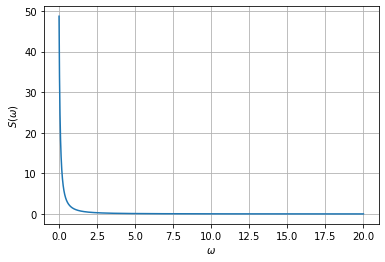

In [2]:
# The auto spectral density of the u-comp according to N400
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as sps
import sys
sys.path.append('./../modules')
from time_integration import * # Import all functions in the module time_integration
w = np.linspace(0,20,10000);
xLu = 100.0; # Integral length scale
Au = 6.8/2/np.pi; # Constant in the auto-spectral density
V = 20.0;   #Mean wind velocity
Iu = 0.15;# Turbulence intensity
Su = (Iu*V)**2*Au*xLu/V/((1+1.5*Au*w*xLu/V)**(5.0/3.0));
# Plot auto spectral density  
plt.figure()    
plt.plot(w,Su,'-')    
plt.xlabel('$\omega$')
plt.ylabel('$S(\omega)$')
plt.grid()

The following formula can obtain realizations of the stochastic process.

$$u(t) = \sum_{n=1}^{N}  A_k cos (\omega_kt + \phi_k) $$

$$A_k = \sqrt{2 S_u(\omega_k) \Delta \omega} $$

Here $S_x(\omega_k)$ is the auto-spectral density of the process, and $\phi_k$ is random phase angles evenly distributed between $0$ and $2\pi$

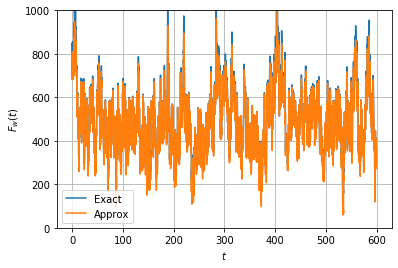

In [12]:
phi = np.random.rand(w.shape[0])*2*np.pi # Random phase angles 
t = np.linspace(0,600,6000) # Time vector
u = np.zeros(t.shape[0]) # Initialize the vector of x values
domega = w[1]-w[0] # Frequency spacing
for k in range(w.shape[0]):
    Ak = (2*Su[k]*domega)**0.5 #Amplitude
    u = u + Ak * np.cos(w[k]*t+ phi[k]) # Sum the contibution from each harmonic component
rho = 1.25
A = 1.0
CD = 2.0
Fwapprox = 1.0/2.0*rho*A*CD*V**2*(1 + 2*u/V)
Fw = 1.0/2.0*rho*A*CD*(V + u)**2
    
plt.figure()
plt.plot(t,Fw,label='Exact');
plt.plot(t,Fwapprox,label = 'Approx')

plt.ylabel(r'$F_w(t)$')
plt.xlabel(r'$t$')
plt.ylim(0, 1000)
plt.grid()
plt.legend();

The figure above shows the wind load obtained using the exact and the approximate expressions. It is clear that the approximation is accurate but that some discrepancies are observed in the peaks of the time series.

## Question 3: Calculate the auto-spectral density of the response and plot its probability density function. Investigate the importance of aerodynamic damping

The wind load is defined as

$$F_w = \frac{1}{2}\rho A C_D V^2\left( 1 + 2\frac{u}{V} -2 \frac{\dot{y}}{V} \right) $$

The equation of motion reads

$$M\ddot{y} + C \dot{y} + Ky = F_w(t) $$

We insert the expression for the wind load.

$$M\ddot{y} + C \dot{y} + Ky = \frac{1}{2}\rho A C_D V^2\left( 1 + 2\frac{u}{V} -2 \frac{\dot{y}}{V} \right)  $$

We need to move the last term in the load to the left side of the differential equation.

$$M\ddot{y} + \left( C + \rho A C_D V\right) \dot{y} + Ky = \frac{1}{2}\rho A C_D V^2\left( 1 + 2\frac{u}{V} \right)  $$

We can now define the load as 

$$X(t) = \frac{1}{2}\rho A C_D V^2\left( 1 + 2\frac{u}{V} \right)  $$

We disregard the mean wind load for now and obtain the auto-correlation function for the dynamic wind load as 

$$R_{X}(\tau) = \left(\rho A C_D V\right)^2 E \left[ u(t)u(t+\tau) \right]  $$

$$R_{X}(\tau) = \left(\rho A C_D V\right)^2 R_u(\tau)  $$

The auto-spectral density of the load is obtained by taking the Fourier transform.

$$S_{X}(\omega) = \left(\rho A C_D V\right)^2 S_u(\omega)  $$

We also need to obtain the frequency response function of the system. We define a aerodynamic damping coefficient $C_{ae} =-\rho A C_D V $. The frequency response function is then defined as


$$H(\omega) = \frac{1}{-\omega^2M+i\omega \left(C-C_{ae} \right) + K} $$

The auto-spectral density of the response is

$$S_{y}(\omega) = \bar{H}(\omega)S_{X}(\omega)H(\omega) $$ 

### Frequency-response function
We start by plotting the frequency response function.


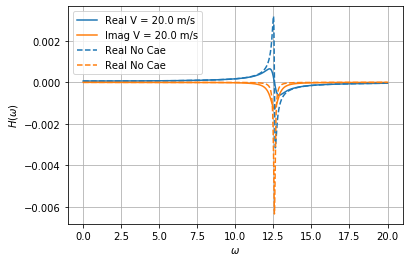

In [93]:
M = 100
omegan = 2*2*np.pi
K = M*omegan**2
zeta = 0.005
C = 2*zeta*M*omegan

Cae = -rho*A*CD*V # Aerodynamic damping

H = 1.0/(-w**2*M + 1j*w*(C-Cae) + K)
H_no_Cae = 1.0/(-w**2*M + 1j*w*(C) + K)

plt.figure()
plt.plot(w,np.real(H),label=('Real V = ' + np.str(V) + ' m/s'))
plt.plot(w,np.imag(H),label=('Imag V = ' + np.str(V) + ' m/s'))
plt.plot(w,np.real(H_no_Cae),'--',label='Real No Cae',color='C0')
plt.plot(w,np.imag(H_no_Cae),'--',label='Real No Cae',color='C1')
plt.grid()
plt.xlabel(r'$\omega$');
plt.ylabel(r'$H(\omega)$');
plt.legend();


The figure illustrates that the aerodynamic damping increases the total damping in the system significantly.

### Load auto-spectral density

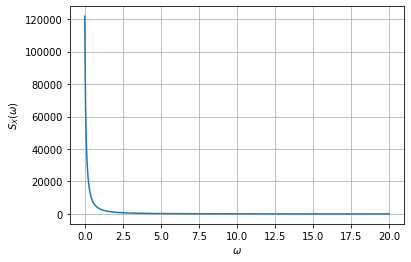

In [77]:
Sx = (rho*A*CD*V)**2*Su

plt.figure()
plt.plot(w,Sx)
plt.grid()
plt.xlabel(r'$\omega$');
plt.ylabel(r'$S_{X}(\omega)$');

### Response auto-spectral density

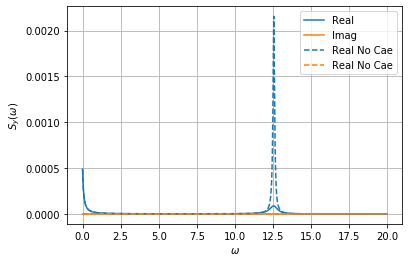

In [92]:
Sy = np.conj(H)*Sx*H # Auto-spectral density of the response
Sy_no_Cae = np.conj(H_no_Cae)*Sx*H_no_Cae # Auto-spectral density of the response

plt.figure()
plt.plot(w,np.real(Sy),label = 'Real')
plt.plot(w,np.imag(Sy),label = 'Imag')
plt.plot(w,np.real(Sy_no_Cae),'--',label='Real No Cae',color='C0')
plt.plot(w,np.imag(Sy_no_Cae),'--',label='Real No Cae',color='C1')
plt.grid()
plt.xlabel(r'$\omega$');
plt.ylabel(r'$S_y(\omega)$');
plt.legend();

### Probability density funtion of response

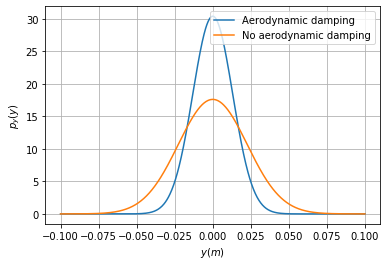

In [96]:
std_y = np.real(np.trapz(Sy,w))**0.5 # Standard deviation of the response

std_y_no_Cae = np.real(np.trapz(Sy_no_Cae,w))**0.5 # Standard deviation of the response

y = np.linspace(-0.1,0.1,1000)
y_pdf = sps.norm.pdf(y,0,std_y) #Probability density function of the load.
y_pdf_no_Cae = sps.norm.pdf(y,0,std_y_no_Cae) #Probability density function of the load.

plt.figure()
plt.plot(y,y_pdf,label = 'Aerodynamic damping')
plt.plot(y,y_pdf_no_Cae,label = 'No aerodynamic damping')
plt.grid()
plt.xlabel(r'$y (m)$')
plt.ylabel(r'$p_y(y)$')
plt.legend();

The frequency-response function, the response's auto-spectral density, and the probability density function illustrate that the aerodynamic damping significantly influences the response. In this case, the aerodynamic damping increases the total damping of the system dramatically. This results in a significantly lower response when the aerodynamic damping is included in the modeling. The aerodynamic damping might reduce the total damping and thus increase the response for other systems. 

## Question 4: Calculate the probability density function of the largest peak for a time interval of 100 seconds
The probability distribution of the largest peak in an interval of duration $T$ follows a Poisson distribution. 

$$ P_{Ma}(a)=Prob\{ max\{ y(t), 0 \le t \le T \} \le a \} = \exp \left[-v_y^+(a)T \right] $$

Here the up-crossing rate is defined by

$$v_y^+(a) = \frac{1}{2\pi} \frac{\sigma_{\dot{y}}}{\sigma_y}\exp\left[ -\frac{1}{2} \left( \frac{a}{\sigma_y} \right)^2 \right] $$

The probability density function is obtained by taking the derivative of the probability distribution function. 

$$ p_{Ma}(a) = \frac{\partial P_{Ma}(a)}{\partial a} $$

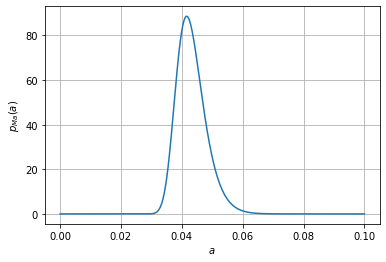

In [101]:
std_doty = np.sqrt(np.real(np.trapz(w**2*Sy,w)))
am = np.linspace(0,0.1,1000)
vy = 1/2/np.pi*std_doty/std_y*np.exp(-0.5*(am/std_y)**2)
T = 100.0
Pma = np.exp(-vy*T)
pma = np.zeros(am.shape[0])
pma[0:pma.shape[0]-1] = np.diff(Pma)/(am[1]-am[0])

plt.figure(100)
plt.plot(am,pma)
plt.grid()
plt.ylabel('$p_{Ma}(a)$')
plt.xlabel('$a$');

## Question 5: Calculate the response in time domain and consider both the exact and approximate wind load model

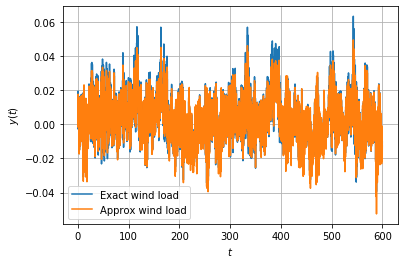

In [135]:
beta = 1.0/4.0 # Constant in the time integration algorithm
gamma = 1.0/2.0 # Constant in the time integration algorithm
h = t[1]-t[0] # Time step
u0 = np.array([[0.0]]) # Initial displacement
udot0 = np.array([[0.0]]) # Initial velocity
MM = np.array([[M]]) # Convert to 2D array (required by the Newmark implementation)
CC = np.array([[C-Cae]]) # Convert to 2D array (required by the Newmark implementation)
KK = np.array([[K]]) # Convert to 2D array (required by the Newmark implementation)

Xapprox = np.array([1.0/2.0*rho*A*CD*2*V*u]) # Approximate and most commonly used wind load definition
X = np.array([1.0/2.0*rho*A*CD*((V+u)**2-V**2) ]) # Full wind load model (Mean value removed)

yapprox, ydotapprox, y2dotapprox = linear_newmark_krenk(MM,CC,KK,Xapprox,u0,udot0,h,gamma,beta)
y, ydot, y2dot = linear_newmark_krenk(MM,CC,KK,X,u0,udot0,h,gamma,beta)

plt.figure()
plt.plot(t,y[0,:],label = 'Exact wind load')
plt.plot(t,yapprox[0,:],label = 'Approx wind load')
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.legend()
plt.grid()

The figure clearly illustrates that the response obtained using the approximate expression for the wind load gives a significantly smaller response than the exact expression. However, it is important to keep in mind that many uncertainties are involved in the response calculations and that the observed difference might be minimal compared with the overall uncertainty.